### Import libraries

In [2]:
import numpy as np 
# import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cvxEDA
import datetime
from scipy import stats
from mpl_toolkits import mplot3d
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.stats import ks_2samp
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu
from sklearn.preprocessing import normalize
sns.set(color_codes = True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Import data day 1

In [3]:
# Sampling frequency 4Hz ~= 0.25s
#6/27/2018
fl_eda_2 = pd.read_csv('../data/day_2/EDA.csv' , header= None)
fl_eda_2.columns  = ['eda']
fl_eda_freq_2 = fl_eda_2.iloc[1].values
print(len(fl_eda_2))
print('freq: ', fl_eda_freq_2)
fl_eda_2.head(10)

5360
freq:  [4.]


,eda
0,1.530229e+09
1,4.000000e+00
2,0.000000e+00
3,1.921900e-02
4,2.562500e-02
5,2.946900e-02
6,2.818800e-02
7,3.075000e-02
8,2.434400e-02
9,3.075000e-02


In [4]:
print(len(fl_eda_2))
fl_eda_2.head(5)

5360


,eda
0,1.530229e+09
1,4.000000e+00
2,0.000000e+00
3,1.921900e-02
4,2.562500e-02


## Convert time

In [5]:
fl_init_time_2 = datetime.datetime.fromtimestamp(fl_eda_2.iloc[0]).strftime('%Y-%m-%d %H:%M:%S')
fl_init_time_2

'2018-06-28 16:42:04'

In [6]:
fl_eda_2 = fl_eda_2.iloc[3:]

In [7]:
fl_time_eda_2 = pd.date_range(start=fl_init_time_2, periods=len(fl_eda_2), 
                              freq=str(1/int(fl_eda_freq_2))+'S')
fl_time_eda_2

DatetimeIndex([       '2018-06-28 16:42:04', '2018-06-28 16:42:04.250000',
               '2018-06-28 16:42:04.500000', '2018-06-28 16:42:04.750000',
                      '2018-06-28 16:42:05', '2018-06-28 16:42:05.250000',
               '2018-06-28 16:42:05.500000', '2018-06-28 16:42:05.750000',
                      '2018-06-28 16:42:06', '2018-06-28 16:42:06.250000',
               ...
               '2018-06-28 17:04:20.750000',        '2018-06-28 17:04:21',
               '2018-06-28 17:04:21.250000', '2018-06-28 17:04:21.500000',
               '2018-06-28 17:04:21.750000',        '2018-06-28 17:04:22',
               '2018-06-28 17:04:22.250000', '2018-06-28 17:04:22.500000',
               '2018-06-28 17:04:22.750000',        '2018-06-28 17:04:23'],
              dtype='datetime64[ns]', length=5357, freq='250L')

In [8]:
fl_eda_2 = fl_eda_2.set_index(fl_time_eda_2, drop =True)
fl_eda_2 = fl_eda_2[:]
fl_eda_2 = fl_eda_2.dropna()
print(len(fl_eda_2))
fl_eda_2.head()

5357


,eda
2018-06-28 16:42:04.000,0.019219
2018-06-28 16:42:04.250,0.025625
2018-06-28 16:42:04.500,0.029469
2018-06-28 16:42:04.750,0.028188
2018-06-28 16:42:05.000,0.030750


# Remove outliers

In [9]:
fl_exp2 = fl_eda_2.copy()#example dataset of normally distributed data. 


fl_exp2= fl_exp2[np.abs(fl_exp2.eda-fl_exp2.eda.mean())<=(3*fl_exp2.eda.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
fl_exp2= fl_exp2[~(np.abs(fl_exp2.eda-fl_exp2.eda.mean())>(3*fl_exp2.eda.std()))] #or if you prefer the other way around
fl_exp2 = fl_exp2.dropna()
print(len(fl_exp2))
fl_exp2.head()

5352


,eda
2018-06-28 16:42:04.000,0.019219
2018-06-28 16:42:04.250,0.025625
2018-06-28 16:42:04.500,0.029469
2018-06-28 16:42:04.750,0.028188
2018-06-28 16:42:05.000,0.030750


## Time marks

In [10]:
tags_2 = pd.read_csv('../data/marks/6.28.csv' , header= None)
tags_2 = tags_2.drop(tags_2.columns[2],axis=1)
tags_2.columns  =  ['tagged_time','presence']
tags_2.head()

,tagged_time,presence
0,2018-06-28 17:01:28.690,0
1,2018-06-28 16:58:28.199,0
2,2018-06-28 16:57:54.920,0
3,2018-06-28 16:57:20.914,0
4,2018-06-28 16:57:20.448,0


In [11]:
tags_2.tagged_time[0]

'2018-06-28 17:01:28.690'

## Separate Data

In [18]:
cat_2 = fl_exp2.loc['2018-06-28 16:42:30.000':'2018-06-28 16:52:55.000']
cat_2.head()

,eda
2018-06-28 16:42:30.000,0.025625
2018-06-28 16:42:30.250,0.030750
2018-06-28 16:42:30.500,0.033313
2018-06-28 16:42:30.750,0.030750
2018-06-28 16:42:31.000,0.033313


# Visualization

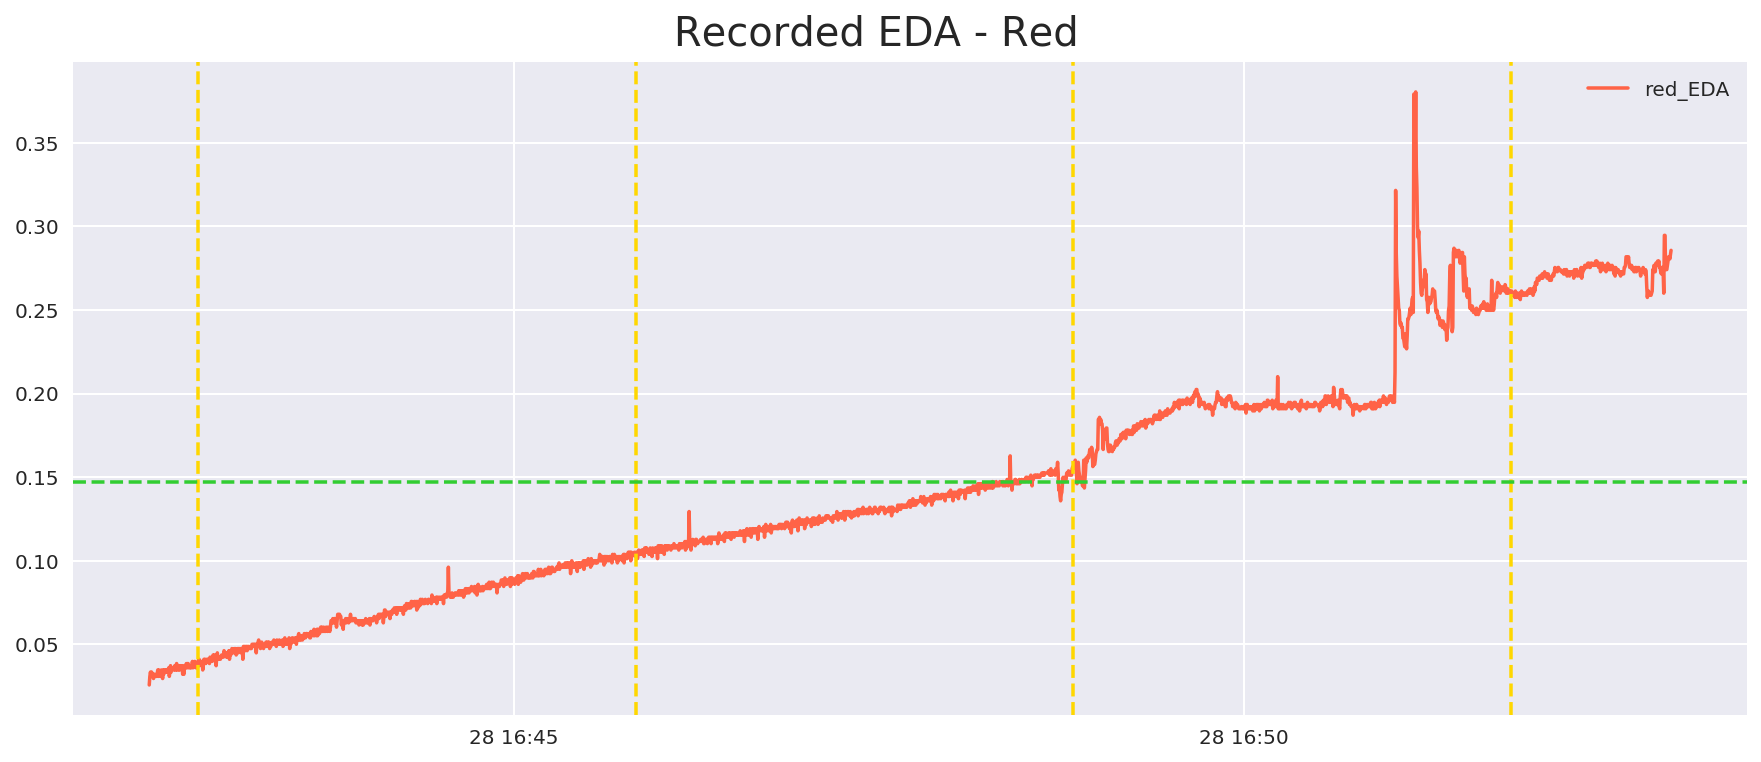

In [19]:
plt.figure(figsize=(15,6))
plt.plot(cat_2['eda'],color ='tomato')
plt.figtext(.5,.9,'Recorded EDA - Red ', fontsize=20, ha='center')
plt.legend(['red_EDA'],loc=1,fontsize='medium')
plt.axvline(x = '2018-06-28 16:42:50.000',color = 'gold',linestyle='--')
plt.axvline(x = '2018-06-28 16:45:50.000',color = 'gold',linestyle='--')
plt.axvline(x = '2018-06-28 16:48:50.000',color = 'gold',linestyle='--')
plt.axvline(x = '2018-06-28 16:51:50.000',color = 'gold',linestyle='--')
# # plt.axvline(x = tags_2.tagged_time[5],color = 'c',linestyle='--')

eda_mean = np.mean(cat_2.eda)
plt.axhline(y = eda_mean, color = 'limegreen', linestyle = '--')
plt.show()


# cvsEDA

In [20]:
params = {'legend.fontsize': 'large',
          'figure.figsize': (10, 8),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pl.rcParams.update(params)

In [21]:
y2 = np.asarray(cat_2.eda)
y2[:10]

array([0.025625, 0.03075 , 0.033313, 0.03075 , 0.033313, 0.03075 ,
       0.032031, 0.029469, 0.032031, 0.032031])

In [22]:
yn2 = (y2 - y2.mean()) / y2.std()
Fs = 4.
[r2, p2, t2, l2, d2, e2, obj2] = cvxEDA.cvxEDA(yn2, 1./Fs)

# pl.rcParams['figure.figsize'] = (30,20)
tm2 = pl.arange(1., len(y2)+1.) / Fs


     pcost       dcost       gap    pres   dres
 0: -1.2452e+03 -1.2403e+03  4e+03  6e+01  3e-01
 1: -1.2448e+03 -1.8547e+03  7e+02  1e+01  6e-02
 2: -1.2462e+03 -1.4273e+03  2e+02  2e+00  1e-02
 3: -1.2468e+03 -1.2865e+03  4e+01  4e-01  2e-03
 4: -1.2467e+03 -1.2651e+03  2e+01  1e-01  8e-04
 5: -1.2475e+03 -1.2524e+03  5e+00  2e-02  1e-04
 6: -1.2493e+03 -1.2504e+03  1e+00  3e-03  2e-05
 7: -1.2498e+03 -1.2502e+03  4e-01  8e-04  4e-06
 8: -1.2500e+03 -1.2502e+03  2e-01  2e-04  1e-06
 9: -1.2501e+03 -1.2501e+03  5e-02  5e-05  2e-07
10: -1.2501e+03 -1.2501e+03  2e-02  1e-05  6e-08
11: -1.2501e+03 -1.2501e+03  4e-03  2e-06  1e-08
12: -1.2501e+03 -1.2501e+03  9e-04  3e-07  2e-09
13: -1.2501e+03 -1.2501e+03  2e-04  4e-08  2e-10
14: -1.2501e+03 -1.2501e+03  3e-05  5e-09  3e-11
15: -1.2501e+03 -1.2501e+03  8e-07  1e-10  6e-13
Optimal solution found.


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


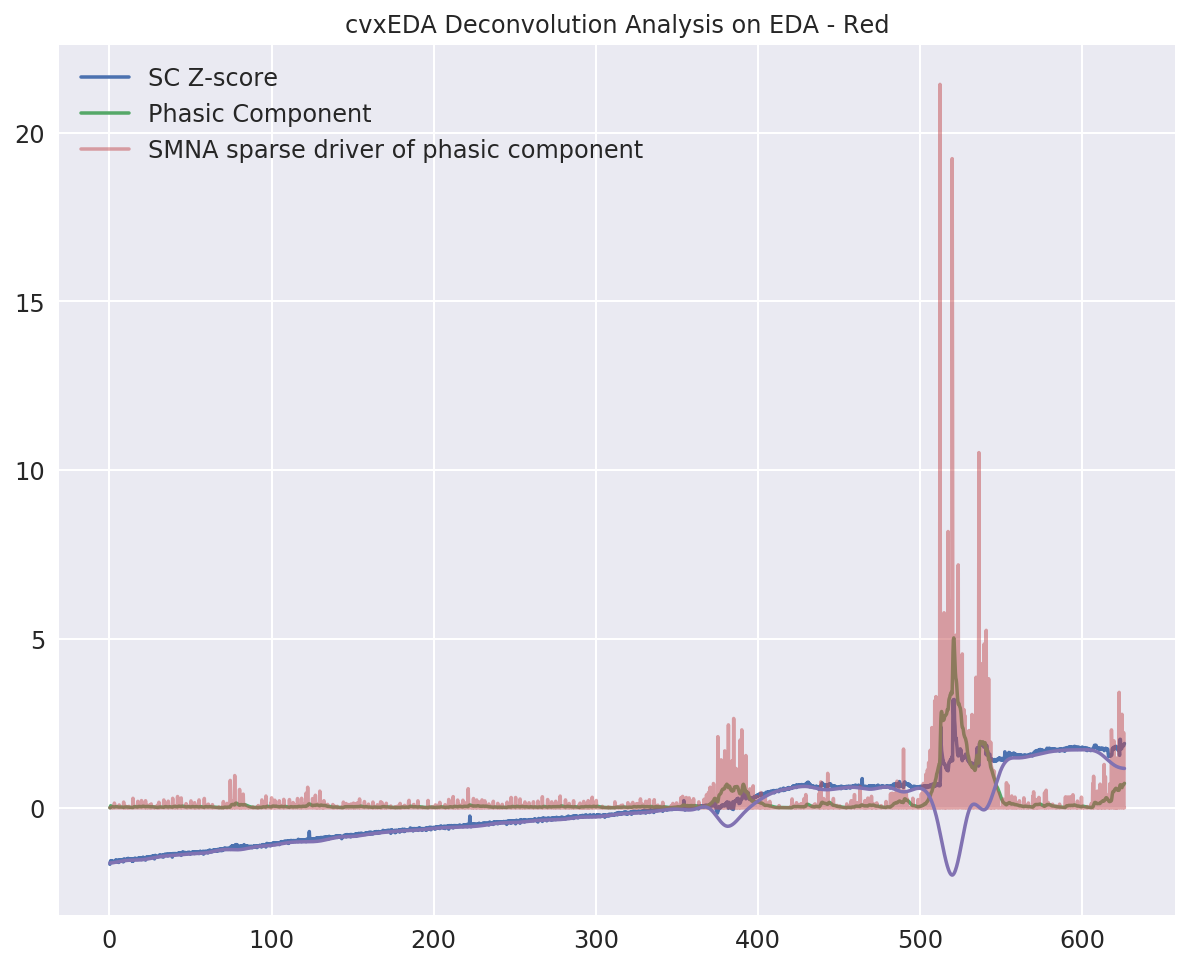

In [24]:
pl.hold(True)
pl.plot(tm2, yn2)
pl.plot(tm2, r2)
pl.plot(tm2, p2,alpha = 0.5)
pl.plot(tm2, t2)


pl.title('cvxEDA Deconvolution Analysis on EDA - Red')
pl.legend(['SC Z-score','Phasic Component','SMNA sparse driver of phasic component',
           ])
plt.show()

## Logarithm 

In [41]:
fl_exp2['eda'] = np.log(fl_exp2['eda'])
fl_exp2.head(5)

,eda
2018-06-27 17:30:03.000,-0.181527
2018-06-27 17:30:03.250,0.166735
2018-06-27 17:30:03.500,0.482208
2018-06-27 17:30:03.750,0.740791
2018-06-27 17:30:04.000,0.789750


In [ ]:
log_eda_mean = np.mean(fl_exp2.eda)
print(log_eda_mean)
plt.figure(figsize=(15,6))
plt.plot(fl_exp2['eda'],color ='limegreen')
plt.figtext(.5,.9,'Stress response to cold showermodulated by social presence experiment- EDA ', fontsize=20, ha='center')
plt.legend(['EDA'],loc=1,fontsize='medium')
plt.axhline(y = log_eda_mean,color = 'salmon',linestyle='--')
plt.axvline(x = tags_2.tagged_time[0],color = 'hotpink',linestyle='--')
plt.axvline(x = tags_2.tagged_time[1],color = 'hotpink',linestyle='--')
plt.axvline(x = tags_2.tagged_time[3],color = 'c',linestyle='--')
plt.axvline(x = tags_2.tagged_time[4],color = 'c',linestyle='--')
plt.axvline(x = tags_2.tagged_time[5],color = 'c',linestyle='--')
plt.show()